In [583]:
import sqlite3
con = sqlite3.connect("J_SNOWMAN_4709336482318969.db")
cur = con.cursor()

# Â§ÑÁêÜËØÑËÆ∫

In [492]:
sql = "select count(*) from comments where id in(select MAX(id) from comments group by created_at,user_id)"

cur.execute(sql)
print(cur.fetchall())

[(11809,)]


In [3]:
sql = "select count(*) from comments"

cur.execute(sql)
print(cur.fetchall())

[(17809,)]


In [4]:
sql = '''
delete from comments
where id not in (
select t.max_id from
(select MAX(id) as max_id from comments group by created_at,user_id) as t)
'''
cur.execute(sql)
print(cur.fetchall())

[]


In [5]:
# ÊúâÊïàËØÑËÆ∫Êï∞Èáè
sql = "select count(*) from comments"

cur.execute(sql)
print(cur.fetchall())

[(11809,)]


In [6]:
# ÁïôË®ÄidÊï∞Èáè
cur.execute("select COUNT(DISTINCT user_id) from comments")
print(cur.fetchall())

[(7656,)]


In [7]:
# 11Êúà30Êó•ÂΩìÂ§©ÁïôË®ÄÊï∞Èáè
sql = "select count(*) from comments where created_at like '%Nov%'"

cur.execute(sql)
print(cur.fetchall())

[(8837,)]


# Êï¥ÁêÜÂá∫ÊúâÊïàÁî®Êà∑

In [8]:
# ÂàõÂª∫Êñ∞ÁöÑË°®
sql = '''
        CREATE TABLE users
        (
            id INTEGER  PRIMARY KEY AUTOINCREMENT,
            user_id varchar,
            user_name varchar
        )
    '''
cur.execute(sql)

OperationalError: table users already exists

In [13]:
# ÊèíÂÖ•‰ªéËØÑËÆ∫ÈáåÊï¥ÁêÜÂá∫ÁöÑÁî®Êà∑
sql = '''
        insert into users(user_id,user_name) 
        select DISTINCT user_id,user_name from comments
    '''
cur.execute(sql)

In [14]:
sql = "select count(*) from users"

cur.execute(sql)
print(cur.fetchall())

[(7657,)]


# ËøêË°åÊó∂ÁöÑ‰∏Ä‰∫õÂ§ÑÁêÜ

In [488]:
# Â∞ÜÁî®Êà∑idÈÄê‰∏™ÊîæÂÖ•Êï∞ÁªÑ
arr = []
sql = "select user_id from users"
cur.execute(sql)
row = cur.fetchone()
while row:
    arr.append(row[0])
    row = cur.fetchone()

In [489]:
# ÊâæÂà∞ÁõÆÊ†áidÁöÑÁ¥¢ÂºïÂ∫èÂè∑
target_ID = '6604984750'
for idx, user_id in enumerate(arr):
    if user_id == target_ID:
        print(f'index of {target_ID} is {idx}')
        # assuming it can be found once - break
        break

index of 6604984750 is 6700


In [490]:
arr[6700:]

['6604984750',
 '6348082433',
 '5846583136',
 '5650963070',
 '3144153171',
 '7630051962',
 '6814134233',
 '7459120119',
 '5170596487',
 '1799754134',
 '7475490836',
 '1839574840',
 '5518743699',
 '1934295497',
 '7414222109',
 '7247579757',
 '2132208624',
 '5866646600',
 '6123571497',
 '5857922940',
 '3823456829',
 '7367430159',
 '6344085778',
 '6446753931',
 '7462823892',
 '2935855123',
 '5767138618',
 '6455268318',
 '5664171960',
 '3251715490',
 '5501870291',
 '2196200532',
 '5615269532',
 '3113455231',
 '5873292948',
 '7490804295',
 '2145891543',
 '7689377530',
 '1842853440',
 '7481767555',
 '6580957093',
 '2159834723',
 '3916120551',
 '6860907506',
 '7167895567',
 '6489757100',
 '7056641479',
 '5516986706',
 '5710111387',
 '7417273801',
 '5645315224',
 '5174234376',
 '2837491514',
 '1801892082',
 '5893040615',
 '5171028315',
 '6337298787',
 '3931499559',
 '5241710100',
 '7103204185',
 '5686037650',
 '5361487790',
 '3291516780',
 '1818184093',
 '2968132442',
 '1776639537',
 '60580977

# ÂÖ≥Ê≥®Ë∂ÖËØùÊÉÖÂÜµÁªüËÆ°

In [493]:
# ÊúâÂ§öÂ∞ë‰∫∫ÊúâÂÖ≥Ê≥®Ë∂ÖËØù
sql = "select count(DISTINCT user_id) from joinStopic"
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)
print(cur.fetchall())

[(7486,)]


In [535]:
# ÊúÄÂ§ö‰∫∫ÂÖ≥Ê≥®ÁöÑË∂ÖËØùÂâç20
sql = "select Stopic_name,count(*) from joinStopic group by Stopic_name order by count(*) desc"
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)
X = []
Y = []

for i in range(0,20):
    result = cur.fetchone()
    X.append(result[0])
    Y.append(result[1])
    print(result)

X.reverse()
Y.reverse()

('Ëé≤ÁêÜÊûùmemi', 4156)
('ÁõÆÈªëËé≤', 4002)
('SnowManÁªÑÂêà', 2935)
('ÈÅìÊûùÈßø‰Ωë', 2404)
('Ê∂àÂ§±ÁöÑÂàùÊÅã', 2224)
('BKPP', 488)
('KinKrit', 483)
('ÂçöÂêõ‰∏ÄËÇñ', 478)
('Êµ™Ëä±Áî∑Â≠ê', 456)
('Êó•ÂâßÁæé‰∏ΩÁöÑ‰ªñ', 448)
('Áéã‰∏ÄÂçö', 442)
('ËÇñÊàò', 425)
('Âêë‰∫ïÂ∫∑‰∫å', 384)
('Èæö‰øä', 366)
('‰Ωê‰πÖÈñìÂ§ß‰ªã', 354)
('Êùë‰∏äÁúüÈÉΩraul', 353)
('Ëé≤ÁêÜÊûùmechi', 342)
('mmkj', 332)
('ÊòìÁÉäÂçÉÁé∫', 242)
('Ê∏°ËæπÁøîÂ§™', 233)


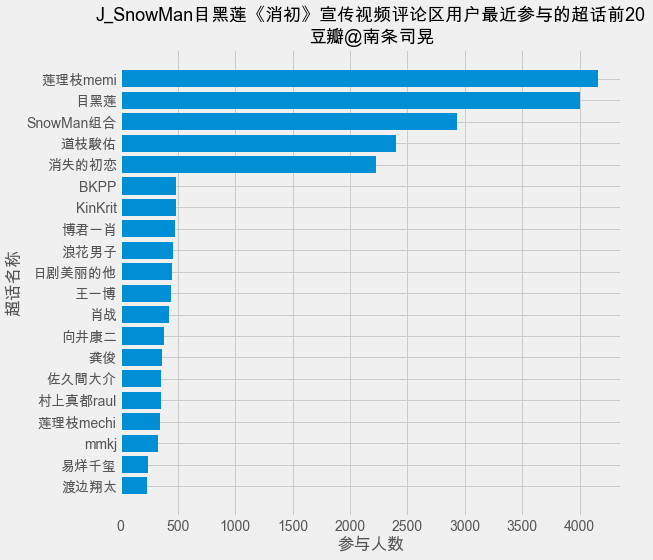

In [536]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(X, Y)
ax.set_title("J_SnowManÁõÆÈªëËé≤„ÄäÊ∂àÂàù„ÄãÂÆ£‰º†ËßÜÈ¢ëËØÑËÆ∫Âå∫Áî®Êà∑ÊúÄËøëÂèÇ‰∏éÁöÑË∂ÖËØùÂâç20\nË±ÜÁì£@ÂçóÊù°Âè∏ÊôÉ", fontsize=18)
ax.set(xlabel='ÂèÇ‰∏é‰∫∫Êï∞', ylabel='Ë∂ÖËØùÂêçÁß∞')
plt.show()

In [496]:
# ÊúÄÂ§ö‰∫∫ÂÖ≥Ê≥®ÁöÑË∂ÖËØùÂâç50
sql = "select Stopic_name,count(*) from joinStopic group by Stopic_name order by count(*) desc"
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)
#X = []
#Y = []

for i in range(0,100):
    result = cur.fetchone()
    #X.append(result[0])
    #Y.append(result[1])
    print(result)

('Ëé≤ÁêÜÊûùmemi', 4156)
('ÁõÆÈªëËé≤', 4002)
('SnowManÁªÑÂêà', 2935)
('ÈÅìÊûùÈßø‰Ωë', 2404)
('Ê∂àÂ§±ÁöÑÂàùÊÅã', 2224)
('BKPP', 488)
('KinKrit', 483)
('ÂçöÂêõ‰∏ÄËÇñ', 478)
('Êµ™Ëä±Áî∑Â≠ê', 456)
('Êó•ÂâßÁæé‰∏ΩÁöÑ‰ªñ', 448)
('Áéã‰∏ÄÂçö', 442)
('ËÇñÊàò', 425)
('Âêë‰∫ïÂ∫∑‰∫å', 384)
('Èæö‰øä', 366)
('‰Ωê‰πÖÈñìÂ§ß‰ªã', 354)
('Êùë‰∏äÁúüÈÉΩraul', 353)
('Ëé≤ÁêÜÊûùmechi', 342)
('mmkj', 332)
('ÊòìÁÉäÂçÉÁé∫', 242)
('Ê∏°ËæπÁøîÂ§™', 233)
('Êú±‰∏ÄÈæô', 218)
('mmrl', 200)
('ÊØèÊó•‰∏ÄÂñÑ', 188)
('Ê£âËä±ÁæéÂ®ÉÂ®É', 188)
('ohmnanon', 187)
('SamYu', 171)
('Â≤©Êú¨ÁÖß', 169)
('ÈòøÈÉ®‰∫ÆÂπ≥', 152)
('keitaeiji', 150)
('Âà∞‰∫Ü30Â≤ÅËøòÊòØÂ§ÑÁî∑‰ºº‰πé‰ºöÂèòÊàêÈ≠îÊ≥ïÂ∏à', 148)
('ÂìàÂà©Ê≥¢ÁâπÈ≠îÊ≥ïËßâÈÜí', 143)
('mewgulf', 139)
('studyaccount', 138)
('Áéã‰øäÂáØ', 135)
('Ê∑±Ê≥ΩËæ∞Âìâ', 135)
('ARASHI', 122)
('ÊàòÂ±±‰∏∫Áéã', 119)
('Êó∂‰ª£Â∞ëÂπ¥Âõ¢', 112)
('ÂÖâ‰∏éÂ§ú‰πãÊÅã', 110)
('ÁôæÈ¶ôÊûúÁßçÊ§çÂü∫Âú∞', 106)
('Âë®Êù∞‰º¶', 105)
('ÂçóÂåócp', 105)
('Èò¥Èò≥Â∏àÊâãÊ∏∏', 103)
('Ëî°ÂæêÂù§', 101)
('ÂéüËÄΩÊé®Êñá', 101)
('188Áî∑

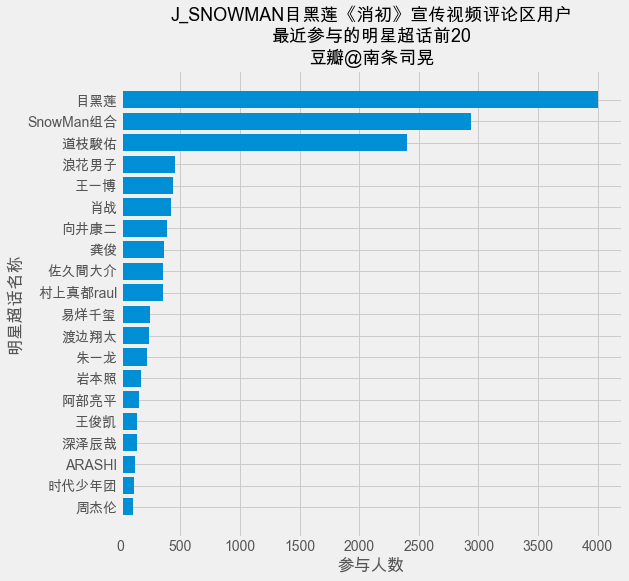

In [532]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(8, 8))
X = ['ÁõÆÈªëËé≤','SnowManÁªÑÂêà','ÈÅìÊûùÈßø‰Ωë','Êµ™Ëä±Áî∑Â≠ê','Áéã‰∏ÄÂçö','ËÇñÊàò','Âêë‰∫ïÂ∫∑‰∫å','Èæö‰øä','‰Ωê‰πÖÈñìÂ§ß‰ªã','Êùë‰∏äÁúüÈÉΩraul'
     ,'ÊòìÁÉäÂçÉÁé∫','Ê∏°ËæπÁøîÂ§™','Êú±‰∏ÄÈæô','Â≤©Êú¨ÁÖß','ÈòøÈÉ®‰∫ÆÂπ≥','Áéã‰øäÂáØ','Ê∑±Ê≥ΩËæ∞Âìâ','ARASHI','Êó∂‰ª£Â∞ëÂπ¥Âõ¢','Âë®Êù∞‰º¶']
Y = [4002,2935,2404,456,442,425,384,366,354,353
     ,242,233,218,169,152,135,135,122,112,105]
X.reverse()
Y.reverse()
ax.barh(X, Y)
ax.set_title("J_SNOWMANÁõÆÈªëËé≤„ÄäÊ∂àÂàù„ÄãÂÆ£‰º†ËßÜÈ¢ëËØÑËÆ∫Âå∫Áî®Êà∑\nÊúÄËøëÂèÇ‰∏éÁöÑÊòéÊòüË∂ÖËØùÂâç20\nË±ÜÁì£@ÂçóÊù°Âè∏ÊôÉ", fontsize=18)
ax.set(xlabel='ÂèÇ‰∏é‰∫∫Êï∞', ylabel='ÊòéÊòüË∂ÖËØùÂêçÁß∞')
plt.show()

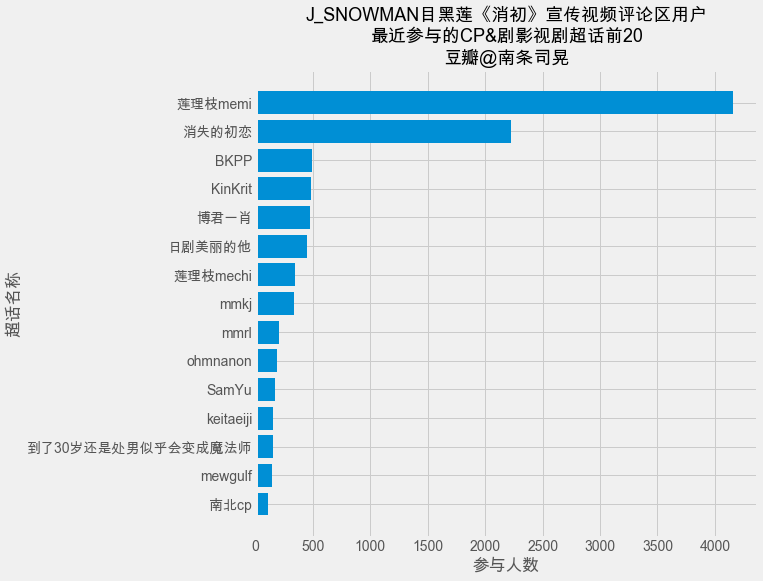

In [534]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(8, 8))
X = ['Ëé≤ÁêÜÊûùmemi','Ê∂àÂ§±ÁöÑÂàùÊÅã','BKPP','KinKrit','ÂçöÂêõ‰∏ÄËÇñ','Êó•ÂâßÁæé‰∏ΩÁöÑ‰ªñ','Ëé≤ÁêÜÊûùmechi','mmkj','mmrl','ohmnanon'
     ,'SamYu','keitaeiji','Âà∞‰∫Ü30Â≤ÅËøòÊòØÂ§ÑÁî∑‰ºº‰πé‰ºöÂèòÊàêÈ≠îÊ≥ïÂ∏à','mewgulf','ÂçóÂåócp']
Y = [4156,2224,488,483,478,448,342,332,200,187
     ,171,150,148,139,105]
X.reverse()
Y.reverse()
ax.barh(X, Y)
ax.set_title("J_SNOWMANÁõÆÈªëËé≤„ÄäÊ∂àÂàù„ÄãÂÆ£‰º†ËßÜÈ¢ëËØÑËÆ∫Âå∫Áî®Êà∑\nÊúÄËøëÂèÇ‰∏éÁöÑCP&ÂâßÂΩ±ËßÜÂâßË∂ÖËØùÂâç20\nË±ÜÁì£@ÂçóÊù°Âè∏ÊôÉ", fontsize=18)
ax.set(xlabel='ÂèÇ‰∏é‰∫∫Êï∞', ylabel='Ë∂ÖËØùÂêçÁß∞')
plt.show()

In [539]:
#ÂÖ≥Ê≥®ÁõÆÈªëËé≤
sql = '''
select count(*)
    from (
    select user_id from joinStopic 
    where Stopic_name like'ÁõÆÈªëËé≤'
    group by user_id 
    )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

meme = int(cur.fetchone()[0])
print(meme)

4001


In [498]:
sql = '''
select count(*)
    from (
    select user_id from joinStopic 
    where Stopic_name like'Ëé≤ÁêÜÊûùmemi'
    group by user_id 
    )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

memi = int(cur.fetchone()[0])
print(memi)

4155


In [499]:
sql = '''
select count(*)
    from (
    select user_id from joinStopic 
    where Stopic_name like'ÈÅìÊûùÈßø‰Ωë'
    group by user_id 
    )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

micchi = int(cur.fetchone()[0])
print(micchi)

2403


In [500]:
# ÂêåÊó∂ÂÖ≥Ê≥® ËøûÁêÜÊûùmemi&ÁõÆÈªëËé≤&ÈÅìÊûùÈßø‰Ωë
sql = '''
select count(*)
    from (
        select user_id from joinStopic 
        where Stopic_name like'Ëé≤ÁêÜÊûùmemi'
        group by user_id 
        intersect 
        select user_id from joinStopic 
        where Stopic_name like'ÁõÆÈªëËé≤'
        group by user_id 
        intersect 
        select user_id from joinStopic 
        where Stopic_name like'ÈÅìÊûùÈßø‰Ωë'
        group by user_id 
        )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

data111 = int(cur.fetchone()[0])
print(data111)

1412


In [501]:
# ÂêåÊó∂ÂÖ≥Ê≥® ËøûÁêÜÊûùmemi&ÁõÆÈªëËé≤
sql = '''
select count(*)
    from (
        select user_id from joinStopic 
        where Stopic_name like'Ëé≤ÁêÜÊûùmemi'
        group by user_id 
        intersect 
        select user_id from joinStopic 
        where Stopic_name like'ÁõÆÈªëËé≤'
        group by user_id 
        )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

data101_111 = int(cur.fetchone()[0])
print(data101_111)
data101 = data101_111 - data111
print(data101)

2226
814


In [502]:
# ÂêåÊó∂ÂÖ≥Ê≥® ËøûÁêÜÊûùmemi&ÈÅìÊûù
sql = '''
select count(*)
    from (
        select user_id from joinStopic 
        where Stopic_name like'Ëé≤ÁêÜÊûùmemi'
        group by user_id 
        intersect 
        select user_id from joinStopic 
        where Stopic_name like'ÈÅìÊûùÈßø‰Ωë'
        group by user_id 
        )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

data011_111 = int(cur.fetchone()[0])
print(data011_111)
data011 = data011_111 - data111
print(data011)

1939
527


In [503]:
# ÂêåÊó∂ÂÖ≥Ê≥® ÁõÆÈªëËé≤&ÈÅìÊûù
sql = '''
select count(*)
    from (
        select user_id from joinStopic 
        where Stopic_name like'ÁõÆÈªëËé≤'
        group by user_id 
        intersect 
        select user_id from joinStopic 
        where Stopic_name like'ÈÅìÊûùÈßø‰Ωë'
        group by user_id 
        )
'''
cur.execute(sql)
row = cur.fetchone()
cur.execute(sql)

data110_111 = int(cur.fetchone()[0])
print(data110_111)
data110 = data110_111 - data111
print(data110)

1717
305


In [504]:
data100 = meme-data110-data101-data111
data001 = memi-data101-data011-data111
data010 = micchi -data110-data011-data111

# ÁîªÂõæ

In [505]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import numpy as np

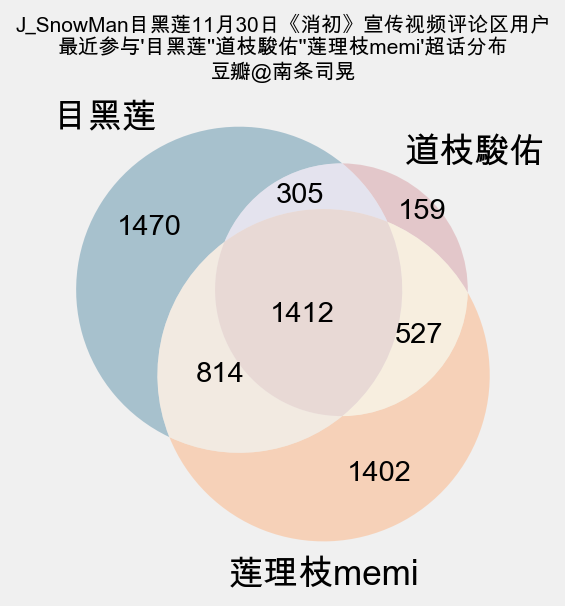

In [538]:
my_dpi=150
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
g=venn3(subsets = {'100': data100, '010': data010, '110': data110, '001': data001, '101': data101, '011': data011, '111': data111},
        set_labels = ("ÁõÆÈªëËé≤", "ÈÅìÊûùÈßø‰Ωë","Ëé≤ÁêÜÊûùmemi"),
        set_colors=("#6093AC", "#D8A0A6", "#FDB482"),
        alpha=0.5,
        normalize_to=1.0,
       )
plt.title("J_SnowManÁõÆÈªëËé≤11Êúà30Êó•„ÄäÊ∂àÂàù„ÄãÂÆ£‰º†ËßÜÈ¢ëËØÑËÆ∫Âå∫Áî®Êà∑\nÊúÄËøëÂèÇ‰∏é'ÁõÆÈªëËé≤''ÈÅìÊûùÈßø‰Ωë''Ëé≤ÁêÜÊûùmemi'Ë∂ÖËØùÂàÜÂ∏É\nË±ÜÁì£@ÂçóÊù°Âè∏ÊôÉ", fontsize=10)
plt.show()

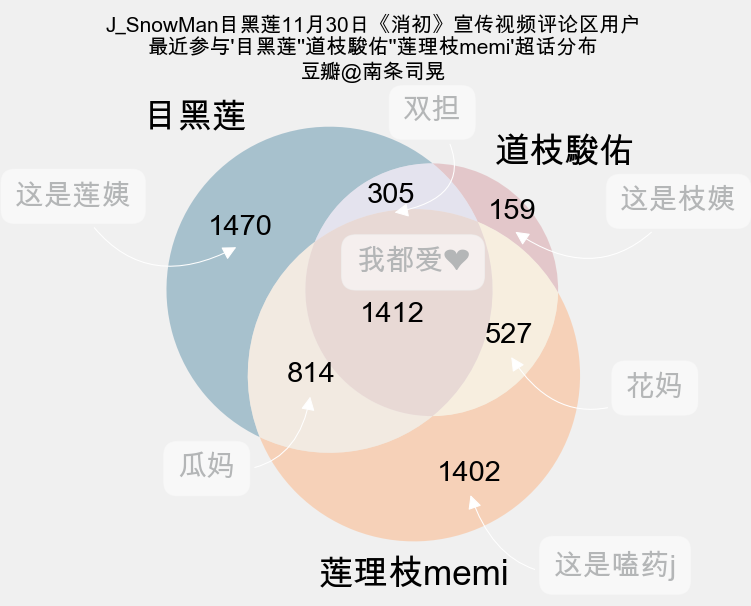

In [537]:
my_dpi=150
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
g=venn3(subsets = {'100': data100, '010': data010, '110': data110, '001': data001, '101': data101, '011': data011, '111': data111},
        set_labels = ("ÁõÆÈªëËé≤", "ÈÅìÊûùÈßø‰Ωë","Ëé≤ÁêÜÊûùmemi"),
        set_colors=("#6093AC", "#D8A0A6", "#FDB482"),
        alpha=0.5,
        normalize_to=1.0,
       )

#for i in list('100, 010, 110, 001, 101, 011, 111'.split(', ')):
#    g.get_label_by_id('%s'%i).set_text('%s'%i)#‰øÆÊîπÊØè‰∏™ÁªÑÂàÜÁöÑÊñáÊú¨
    
#ÁÑ∂ÂêéÂ∞±ÂèØ‰ª•Â¶ÇÂêåvenn2‰∏≠ÈÇ£Ê†∑‰∏™ÊÄßÂåñËÆæÁΩÆ‰∫Ü
#g.get_label_by_id('110').set_color('red')#1ÁöÑÈ¢úËâ≤
#g.get_patch_by_id('110').set_edgecolor('red')
plt.annotate('ËøôÊòØËé≤Âß®', 
             color='#B4B6B7',
             xy=g.get_label_by_id('100').get_position() - np.array([0, 0.05]), 
             xytext=(-80,20),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6),#Ê≥®ÈáäÊñáÂ≠óÂ∫ïÁ∫π
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.5',color='#FFFFFF')#ÁÆ≠Â§¥Â±ûÊÄßËÆæÁΩÆ
            )

plt.annotate('ËøôÊòØÊûùÂß®', 
             color='#B4B6B7',
             xy=g.get_label_by_id('010').get_position() - np.array([0, 0.05]), 
             xytext=(80,10),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6),#Ê≥®ÈáäÊñáÂ≠óÂ∫ïÁ∫π
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.5',color='#FFFFFF')#ÁÆ≠Â§¥Â±ûÊÄßËÆæÁΩÆ
            )

plt.annotate('ËøôÊòØÂóëËçØj', 
             color='#B4B6B7',
             xy=g.get_label_by_id('001').get_position() - np.array([0, 0.05]), 
             xytext=(70,-40),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6),#Ê≥®ÈáäÊñáÂ≠óÂ∫ïÁ∫π
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.5',color='#FFFFFF')#ÁÆ≠Â§¥Â±ûÊÄßËÆæÁΩÆ
            )

plt.annotate('ÁìúÂ¶à', 
             color='#B4B6B7',
             xy=g.get_label_by_id('101').get_position() - np.array([0, 0.05]), 
             xytext=(-50,-40),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6),#Ê≥®ÈáäÊñáÂ≠óÂ∫ïÁ∫π
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.5',color='#FFFFFF')#ÁÆ≠Â§¥Â±ûÊÄßËÆæÁΩÆ
            )

plt.annotate('Ëä±Â¶à', 
             color='#B4B6B7',
             xy=g.get_label_by_id('011').get_position() - np.array([0, 0.05]), 
             xytext=(70,-20),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6),#Ê≥®ÈáäÊñáÂ≠óÂ∫ïÁ∫π
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.5',color='#FFFFFF')#ÁÆ≠Â§¥Â±ûÊÄßËÆæÁΩÆ
            )

plt.annotate('ÊàëÈÉΩÁà±‚ù§', 
             color='#B4B6B7',
             xy=g.get_label_by_id('111').get_position() - np.array([0, 0.05]), 
             xytext=(10,30),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6)#Ê≥®ÈáäÊñáÂ≠óÂ∫ïÁ∫π
            )

plt.annotate('ÂèåÊãÖ', 
             color='#B4B6B7',
             xy=g.get_label_by_id('110').get_position() - np.array([0, 0.05]), 
             xytext=(20,45),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFFFF', alpha=0.6),#Ê≥®ÈáäÊñáÂ≠óÂ∫ïÁ∫π
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.8',color='#FFFFFF')#ÁÆ≠Â§¥Â±ûÊÄßËÆæÁΩÆ
            )
plt.title("J_SnowManÁõÆÈªëËé≤11Êúà30Êó•„ÄäÊ∂àÂàù„ÄãÂÆ£‰º†ËßÜÈ¢ëËØÑËÆ∫Âå∫Áî®Êà∑\nÊúÄËøëÂèÇ‰∏é'ÁõÆÈªëËé≤''ÈÅìÊûùÈßø‰Ωë''Ëé≤ÁêÜÊûùmemi'Ë∂ÖËØùÂàÜÂ∏É\nË±ÜÁì£@ÂçóÊù°Âè∏ÊôÉ", fontsize=10)
plt.show()

# ÂêÑ‰ΩçÈÉΩÂú®ËØ¥‰ªÄ‰πàÂë¢

## Á≠õÈÄâËØÑËÆ∫

In [507]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import jieba

In [508]:
# ÊâÄÊúâËØÑËÆ∫
sql = "select text from comments"

cur.execute(sql)
with open("comment_all.txt","a") as f:
    row = cur.fetchone()
    while row:
        f.write(row[0]+"\n")
        row = cur.fetchone()

In [557]:
# Âè™ÂÖ≥Ê≥®ÁõÆÈªëÊ≤°ÊúâÂÖ≥Ê≥®Ëé≤ÁêÜÊûùÂíåÈÅìÊûùÁöÑÁî®Êà∑ÁöÑËØÑËÆ∫
sql = '''
select text
from comments 
where user_id in
(
        select user_id  from joinStopic 
        where Stopic_name like'ÁõÆÈªëËé≤'
        group by user_id 
        except
        select user_id from joinStopic 
        where Stopic_name like'Ëé≤ÁêÜÊûùmemi'
        group by user_id 
        except 
        select user_id from joinStopic 
        where Stopic_name like'ÈÅìÊûùÈßø‰Ωë'
        group by user_id
        )
'''

cur.execute(sql)
with open("comment_meme.txt","a") as f:
    row = cur.fetchone()
    while row:
        f.write(row[0]+"\n")
        row = cur.fetchone()

In [570]:
# Âè™ÂÖ≥Ê≥®ÈÅìÊûùÊ≤°ÊúâÂÖ≥Ê≥®Ëé≤ÁêÜÊûùÂíåÁõÆÈªëÁöÑÁî®Êà∑ÁöÑËØÑËÆ∫
sql = '''
select text
from comments 
where user_id in
(
        select user_id  from joinStopic 
        where Stopic_name like'ÈÅìÊûùÈßø‰Ωë'
        group by user_id 
        except
        select user_id from joinStopic 
        where Stopic_name like'Ëé≤ÁêÜÊûùmemi'
        group by user_id 
        except 
        select user_id from joinStopic 
        where Stopic_name like'ÁõÆÈªëËé≤'
        group by user_id
        )
'''

cur.execute(sql)
with open("comment_micchi.txt","a") as f:
    row = cur.fetchone()
    while row:
        f.write(row[0]+"\n")
        row = cur.fetchone()

## ÁÆÄÂçïËØç‰∫ë

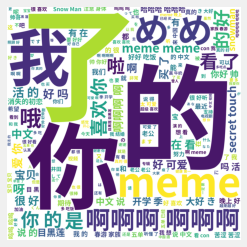

In [569]:
# open the file with "read" attribute
f_text = open('comment_meme.txt', 'r').read()
jieba.load_userdict(userdict)
res = jieba.cut(f_text,cut_all=False, HMM=True)						#split chinese characters using jieba package
res_text = ' '.join(res)					
#background_img = plt.imread('back.jpeg')
STOPWORDS.add('via')						 #add stop words

#generate the word cloud
wc = WordCloud(background_color="white",width=3000,height=3000,margin=2,stopwords=STOPWORDS, font_path='SourceHanSans-Bold.ttf').generate(res_text)

#show the image
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('comment_meme.png')

## ËØçÈ¢ëËØç‰∫ë

In [584]:
# ÂØºÂÖ•Êâ©Â±ïÂ∫ì
import re                           # Ê≠£ÂàôË°®ËææÂºèÂ∫ì
import jieba                        # ÁªìÂ∑¥ÂàÜËØç
import jieba.posseg                 # ËØçÊÄßËé∑Âèñ
import collections                  # ËØçÈ¢ëÁªüËÆ°Â∫ì
import numpy                        # numpyÊï∞ÊçÆÂ§ÑÁêÜÂ∫ì
from PIL import Image               # ÂõæÂÉèÂ§ÑÁêÜÂ∫ì
import wordcloud                    # ËØç‰∫ëÂ±ïÁ§∫Â∫ì
import matplotlib.pyplot as plt     # ÂõæÂÉèÂ±ïÁ§∫Â∫ìÔºàËøôÈáå‰ª•plt‰ª£Ë°®Â∫ìÁöÑÂÖ®Áß∞Ôºâ

In [585]:
# ‰∏ªË¶ÅÂäüËÉΩËá™ÂÆö‰πâËÆæÁΩÆ
Analysis_text = 'comment_all.txt'        # ÂàÜÊûêÊñáÊ°£
userdict = 'userdict.txt'             # Áî®Êà∑ËØçÂÖ∏
StopWords = 'stopwords1893.txt'            # ÂÅúÁî®ËØçÂ∫ì
number = 150                          # ÁªüËÆ°‰∏™Êï∞
Output = 'ËØçÈ¢ë.txt'                   # ËæìÂá∫Êñá‰ª∂
background = 'ËØçÈ¢ëËÉåÊôØ.jpg'           # ËØçÈ¢ëËÉåÊôØ

In [586]:
# ËØªÂèñÊñá‰ª∂
fn = open(Analysis_text,'r',encoding = 'UTF-8')  # ÊâìÂºÄÊñá‰ª∂
string_data = fn.read()                          # ËØªÂá∫Êï¥‰∏™Êñá‰ª∂
fn.close()                                       # ÂÖ≥Èó≠Êñá‰ª∂

In [587]:
# ÊñáÊú¨È¢ÑÂ§ÑÁêÜ
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # ÂÆö‰πâÊ≠£ÂàôË°®ËææÂºèÂåπÈÖçÊ®°ÂºèÔºàÁ©∫Ê†ºÁ≠âÔºâ
string_data = re.sub(pattern, '', string_data)     # Â∞ÜÁ¨¶ÂêàÊ®°ÂºèÁöÑÂ≠óÁ¨¶ÂéªÈô§

In [588]:
# Âä®ÊÄÅË∞ÉÊï¥ËØçÂÖ∏
# jieba.suggest_freq('Ê∂à„Åà„ÅüÂàùÊÅã', True)     #TrueË°®Á§∫ËØ•ËØç‰∏çËÉΩË¢´ÂàÜÂâ≤ÔºåFalseË°®Á§∫ËØ•ËØçËÉΩË¢´ÂàÜÂâ≤

# Ê∑ªÂä†Áî®Êà∑ËØçÂÖ∏
jieba.load_userdict(userdict)

In [589]:
# ÊñáÊú¨ÂàÜËØç
seg_list_exact = jieba.cut(string_data, HMM=True)    # Á≤æÁ°ÆÊ®°ÂºèÂàÜËØç+HMM
object_list = []

In [590]:
# ÂéªÈô§ÂÅúÁî®ËØçÔºàÂéªÊéâ‰∏Ä‰∫õÊÑè‰πâ‰∏çÂ§ßÁöÑËØçÔºåÂ¶ÇÊ†áÁÇπÁ¨¶Âè∑„ÄÅÂóØ„ÄÅÂïäÁ≠âÔºâ
with open(StopWords, 'r', encoding='UTF-8') as meaninglessFile:
    stopwords = set(meaninglessFile.read().split('\n'))
stopwords.add(' ')
for word in seg_list_exact:         # Âæ™ÁéØËØªÂá∫ÊØè‰∏™ÂàÜËØç
    if word not in stopwords:       # Â¶ÇÊûú‰∏çÂú®ÂéªÈô§ËØçÂ∫ì‰∏≠
        object_list.append(word)    # ÂàÜËØçËøΩÂä†Âà∞ÂàóË°®

In [591]:
# ËØçÈ¢ëÁªüËÆ°
word_counts = collections.Counter(object_list)       # ÂØπÂàÜËØçÂÅöËØçÈ¢ëÁªüËÆ°
word_counts_top = word_counts.most_common(number)    # Ëé∑ÂèñÂâçnumber‰∏™ÊúÄÈ´òÈ¢ëÁöÑËØç

In [592]:
# Ëã±ÊñáËØçÊÄßËΩ¨‰∏≠ÊñáËØçÊÄßÂ≠óÂÖ∏ÔºöÁÆÄÊ¥ÅÁâà
En2Cn = {
    'a'    : 'ÂΩ¢ÂÆπËØç',
    'ad'   : 'ÂΩ¢ÂÆπËØç',
    'ag'   : 'ÂΩ¢ÂÆπËØç',
    'al'   : 'ÂΩ¢ÂÆπËØç',
    'an'   : 'ÂΩ¢ÂÆπËØç',
    'b'    : 'Âå∫Âà´ËØç',
    'bl'   : 'Âå∫Âà´ËØç',
    'c'    : 'ËøûËØç',
    'cc'   : 'ËøûËØç',
    'd'    : 'ÂâØËØç',
    'e'    : 'ÂèπËØç',
    'eng'  : 'Ëã±Êñá',
    'f'    : 'Êñπ‰ΩçËØç',
    'g'    : 'ËØ≠Á¥†',
    'h'    : 'ÂâçÁºÄ',
    'i'    : 'ÊàêËØ≠',
    'j'    : 'ÁÆÄÁß∞Áï•ËØ≠',
    'k'    : 'ÂêéÁºÄ',
    'l'    : '‰π†Áî®ËØ≠',
    'm'    : 'Êï∞ËØç',
    'mq'   : 'Êï∞ÈáèËØç',
    'n'    : 'ÂêçËØç',
    'ng'   : 'ÂêçËØç',
    'nl'   : 'ÂêçËØç',
    'nr'   : 'ÂêçËØç',
    'nr1'  : 'ÂêçËØç',
    'nr2'  : 'ÂêçËØç',
    'nrf'  : 'ÂêçËØç',
    'nrfg' : 'ÂêçËØç',    
    'nrj'  : 'ÂêçËØç',
    'ns'   : 'ÂêçËØç',
    'nsf'  : 'ÂêçËØç',
    'nt'   : 'ÂêçËØç',
    'nz'   : 'ÂêçËØç',
    'o'    : 'ÊãüÂ£∞ËØç',
    'p'    : '‰ªãËØç',
    'pba'  : '‰ªãËØç',
    'pbei' : '‰ªãËØç',
    'q'    : 'ÈáèËØç',
    'qt'   : 'ÈáèËØç',
    'qv'   : 'ÈáèËØç',
    'r'    : '‰ª£ËØç',
    'rg'   : '‰ª£ËØç',
    'rr'   : '‰ª£ËØç',
    'rz'   : '‰ª£ËØç',
    'rzs'  : '‰ª£ËØç',
    'rzt'  : '‰ª£ËØç',
    'rzv'  : '‰ª£ËØç',
    'ry'   : '‰ª£ËØç',
    'rys'  : '‰ª£ËØç',
    'ryt'  : '‰ª£ËØç',
    'ryv'  : '‰ª£ËØç',
    's'    : 'Â§ÑÊâÄËØç',
    't'    : 'Êó∂Èó¥ËØç',
    'tg'   : 'Êó∂Èó¥ËØç',
    'u'    : 'Âä©ËØç',
    'ude1' : 'Âä©ËØç',
    'ude2' : 'Âä©ËØç',
    'ude3' : 'Âä©ËØç',
    'udeng': 'Âä©ËØç',
    'udh'  : 'Âä©ËØç',
    'uguo' : 'Âä©ËØç',
    'ule'  : 'Âä©ËØç',
    'ulian': 'Âä©ËØç',
    'uls'  : 'Âä©ËØç',
    'usuo' : 'Âä©ËØç',
    'uyy'  : 'Âä©ËØç',
    'uzhe' : 'Âä©ËØç',
    'uzhi' : 'Âä©ËØç',
    'v'    : 'Âä®ËØç',
    'vd'   : 'Âä®ËØç',
    'vf'   : 'Âä®ËØç',
    'vg'   : 'Âä®ËØç',
    'vi'   : 'Âä®ËØç',
    'vl'   : 'Âä®ËØç',
    'vn'   : 'Âä®ËØç',
    'vshi' : 'Âä®ËØç',
    'vx'   : 'Âä®ËØç',
    'vyou' : 'Âä®ËØç',
    'w'    : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wb'   : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wd'   : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wf'   : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wj'   : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wh'   : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wkz'  : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wky'  : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wm'   : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wn'   : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wp'   : 'Ê†áÁÇπÁ¨¶Âè∑',
    'ws'   : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wt'   : 'Ê†áÁÇπÁ¨¶Âè∑',
    'ww'   : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wyz'  : 'Ê†áÁÇπÁ¨¶Âè∑',
    'wyy'  : 'Ê†áÁÇπÁ¨¶Âè∑',
    'x'    : 'Â≠óÁ¨¶‰∏≤',
    'xu'   : 'Â≠óÁ¨¶‰∏≤',
    'xx'   : 'Â≠óÁ¨¶‰∏≤',
    'y'    : 'ËØ≠Ê∞îËØç',
    'z'    : 'Áä∂ÊÄÅËØç',
    'un'   : 'Êú™Áü•ËØç',
}

In [593]:
# ËæìÂá∫Ëá≥Â∑•‰ΩúÂè∞ÔºåÂπ∂ÂØºÂá∫‚ÄúËØçÈ¢ë.txt‚ÄùÊñá‰ª∂
print ('\nËØçËØ≠\tËØçÈ¢ë\tËØçÊÄß')
print ('‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî')
fileOut = open(Output,'w',encoding='UTF-8')     # ÂàõÂª∫ÊñáÊú¨Êñá‰ª∂ÔºõËã•Â∑≤Â≠òÂú®ÔºåÂàôËøõË°åË¶ÜÁõñ
fileOut.write('ËØçËØ≠\tËØçÈ¢ë\tËØçÊÄß\n')
fileOut.write('‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî\n')
count = 0
for TopWord,Frequency in word_counts_top:                       # Ëé∑ÂèñËØçËØ≠ÂíåËØçÈ¢ë
    for POS in jieba.posseg.cut(TopWord):                       # Ëé∑ÂèñËØçÊÄß
        if count == number:
            break
        print(TopWord + '\t',str(Frequency) + '\t',list(En2Cn.values())[list(En2Cn.keys()).index(POS.flag)])                    # ÈÄêË°åËæìÂá∫Êï∞ÊçÆ
        fileOut.write(TopWord + '\t' + str(Frequency) + '\t' + list(En2Cn.values())[list(En2Cn.keys()).index(POS.flag)] + '\n') # ÈÄêË°åÂÜôÂÖ•strÊ†ºÂºèÊï∞ÊçÆ
        count += 1
fileOut.close()                                                 # ÂÖ≥Èó≠Êñá‰ª∂


ËØçËØ≠	ËØçÈ¢ë	ËØçÊÄß
‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
meme	 9924	 Â≠óÁ¨¶‰∏≤
Á¨¨‰∫åÂ≠£	 5904	 Êï∞ËØç
Ê∂àÂ§±ÁöÑÂàùÊÅã	 5679	 Â≠óÁ¨¶‰∏≤
‰∏≠Êñá	 5253	 ÂêçËØç
„ÇÅ	 4797	 Â≠óÁ¨¶‰∏≤
ÂñúÊ¨¢	 4656	 Âä®ËØç
ÂïäÂïäÂïä	 4629	 ÂêçËØç
üñ§	 4455	 Â≠óÁ¨¶‰∏≤
„Åü	 3684	 Â≠óÁ¨¶‰∏≤
ËØ¥	 3330	 Âä®ËØç
ÂìàÂìàÂìà	 3291	 ÊãüÂ£∞ËØç
Â≠£	 2925	 ÂêçËØç
ÂºÄÂ≠¶	 2616	 ÂêçËØç
„Åà	 2448	 Â≠óÁ¨¶‰∏≤
ÂàùÊÅã	 2394	 Âä®ËØç
Ê∂à	 2373	 Âä®ËØç
ÂèØÁà±	 2334	 Âä®ËØç
ÊúüÂæÖ	 2301	 Âä®ËØç
„ÅÑ	 2283	 Â≠óÁ¨¶‰∏≤
ÁúüÁöÑ	 2130	 ÂâØËØç
Áà±	 1953	 Âä®ËØç
Â•ΩÁúã	 1842	 Âä®ËØç
ÁõÆÈªëËé≤	 1836	 Â≠óÁ¨¶‰∏≤
‰∏≠ÂõΩ	 1833	 ÂêçËØç
„Åó	 1743	 Â≠óÁ¨¶‰∏≤
„Åô	 1725	 Â≠óÁ¨¶‰∏≤
„Å¶	 1689	 Â≠óÁ¨¶‰∏≤
üì¢	 1596	 Â≠óÁ¨¶‰∏≤
Â∏åÊúõ	 1593	 Âä®ËØç
Ëã¶Ê∂©	 1548	 ÂΩ¢ÂÆπËØç
ËÄÅÂÖ¨	 1518	 ÂêçËØç
‰π∞	 1479	 Âä®ËØç
ÂÆ∂Êóè	 1461	 ÂêçËØç
ÂëúÂëú	 1455	 ‰π†Áî®ËØ≠
Êò•Ê∏∏	 1443	 ÂêçËØç
Ë∂ÖÁ∫ß	 1434	 Âå∫Âà´ËØç
Â•ΩÂ•Ω	 1401	 ÂâØËØç
„Å®	 1323	 Â≠óÁ¨¶‰∏≤
„Åç	 1302	 Â≠óÁ¨¶‰∏≤
„Åß	 1269	 Â≠óÁ¨¶‰∏≤
üì£	 1245	 Â≠óÁ¨¶‰∏≤
„Åæ	 1242	 Â≠óÁ¨¶‰∏≤
ÂìàÂìàÂìàÂìà	 1236	 ÊãüÂ£∞ËØç
ÊÉ≥	 11

ValueError: 'touch' is not in list

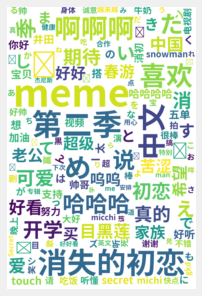

In [594]:
# ËØçÈ¢ëÂ±ïÁ§∫
#mask = numpy.array(Image.open(background))      # ÂÆö‰πâËØçÈ¢ëËÉåÊôØ
wc = wordcloud.WordCloud(
    font_path = 'SourceHanSans-Bold.ttf', # ËÆæÁΩÆÂ≠ó‰ΩìÔºàËøôÈáåÈÄâÊã©‚Äú‰ªøÂÆã‚ÄùÔºâ
    background_color='white',                   # ËÉåÊôØÈ¢úËâ≤
    #mask = mask,                                # ÊñáÂ≠óÈ¢úËâ≤+ÂΩ¢Áä∂ÔºàÊúâmaskÂèÇÊï∞ÂÜçËÆæÂÆöÂÆΩÈ´òÊòØÊó†ÊïàÁöÑÔºâ
    width=1000,height=1500,
    max_words = number,                         # ÊòæÁ§∫ËØçÊï∞
    max_font_size = 200                         # ÊúÄÂ§ßÂ≠óÂè∑
)

wc.generate_from_frequencies(word_counts)                                        # ‰ªéÂ≠óÂÖ∏ÁîüÊàêËØç‰∫ë
# wc.recolor(color_func=wordcloud.ImageColorGenerator(mask))                       # Â∞ÜËØç‰∫ëÈ¢úËâ≤ËÆæÁΩÆ‰∏∫ËÉåÊôØÂõæÊñπÊ°à
plt.figure('ËØç‰∫ë')                                                               # ÂºπÊ°ÜÂêçÁß∞‰∏éÂ§ßÂ∞è
plt.subplots_adjust(top=0.99,bottom=0.01,right=0.99,left=0.01,hspace=0,wspace=0) # Ë∞ÉÊï¥ËæπË∑ù
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')                       # Â§ÑÁêÜËØç‰∫ë
wc.to_file('comment_all_f.png')
plt.axis('off')                                                                  # ÂÖ≥Èó≠ÂùêÊ†áËΩ¥
plt.show()  

# ÁªìÊùü

In [582]:
cur.close()
con.commit()
con.close()